In [207]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression 
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
data = pd.read_csv("GOLD.csv")

In [209]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [210]:
df = data.dropna()
df2 = data[data["Pred"].isnull()]
predictions = df["Pred"]

Pred column is a Linear function

In [211]:
regr = LinearRegression() 
X_train = df[["Price", "Open", "High", "Low"]]
y_train = predictions
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
coe = list(regr.coef_)
coefs = [round(c, 2) for c in coe]

In [213]:
print("Pred = Price * {} + Open * {} + High * {} + Low * {}".format(coefs[0], coefs[1], coefs[3], coefs[3]))

Pred = Price * 2.0 + Open * 3.0 + High * -4.0 + Low * -4.0


In [214]:
data["Pred"] = data.apply(lambda x: x.Pred if(pd.notnull(x.Pred)) else x.Price*coefs[0] + x.Open*coefs[1] + x.High*coefs[2] + x.Low*coefs[3],axis=1)

In [215]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [216]:
data["Price"][1] * coefs[0] + data["Open"][1] * coefs[1] + data["High"][1] * coefs[2] + data["Low"][1] * coefs[3]

-146.0

New column is Polynomial Function

In [217]:
#check if any nan value in new column
np.sum(data["new"].isnull())

0

In [218]:
regr2 = LinearRegression() 
X_train = data[["Price", "Open", "High", "Low"]]
y_train = data["new"]
regr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
coe2 = list(regr.coef_)
coefs2 = [round(c, 2) for c in coe2]
print("new = Price * {} + Open * {} + High * {} + Low * {}".format(coefs2[0], coefs2[1], coefs2[3], coefs2[3]))

new = Price * 2.0 + Open * 3.0 + High * -4.0 + Low * -4.0


In [220]:
data["Price"][1] * coefs2[0] + data["Open"][1] * coefs2[1] + data["High"][1] * coefs2[2] + data["Low"][1] * coefs2[3]

-146.0

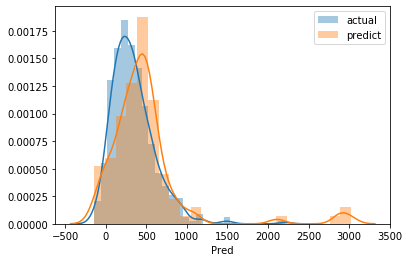

In [221]:
#Plotting to see if the distribution of predicted and actual values is same for Linear Function
X_test = df2[["Price", "Open", "High", "Low"]]
sns.distplot(df["Pred"], label="actual")
sns.distplot(regr.predict(X_test), label="predict")
plt.legend()

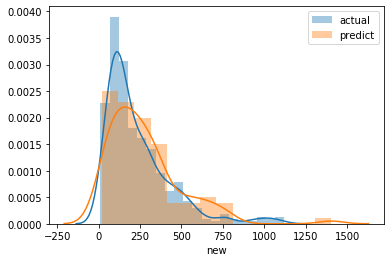

In [222]:
#Plotting to see if the distribution of predicted and actual values is same for Polynomial Function
sns.distplot(df["new"], label="actual")
sns.distplot(regr2.predict(X_test), label="predict")
plt.legend()

In the first plot, the predict and actual curves are quite close whereas in case of second plot, the curves are more dissimilar. This is because the regr2 cannot fit the polynomial relationship needed to predict the new column values.

In [259]:
stock = pd.read_csv("Mid_Cap/DHFL.csv")
nifty = pd.read_csv("Nifty50/Nifty50.csv")

In [260]:
stock.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,DHFL,EQ,15-May-2017,426.65,429.5,434.4,427.05,431.0,431.4,430.94,1160661,500175906.3,15111,295581,25.47
1,DHFL,N6,15-May-2017,1007.25,1009.9,1009.9,1009.90,1009.9,1009.9,1009.90,50,50495.0,1,50,100.00
2,DHFL,N8,15-May-2017,1055.00,1055.2,1055.2,1055.20,1055.2,1055.2,1055.20,48,50649.6,2,48,100.00
3,DHFL,NaN,15-May-2017,1070.00,1070.0,1070.0,1070.00,1070.0,1070.0,1070.00,1,1070.0,1,1,100.00
4,DHFL,NB,15-May-2017,1040.00,1050.0,1050.0,1050.00,1050.0,1050.0,1050.00,6,6300.0,1,6,100.00


In [261]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [262]:
stock["Date"] = pd.to_datetime(stock.Date)
stock = stock.sort_values("Date", ascending=False)
stock.set_index("Date", inplace=True)

In [263]:
nifty["Date"] = pd.to_datetime(nifty.Date)
nifty = nifty.sort_values("Date", ascending=False)
nifty.set_index("Date", inplace=True)

In [264]:
stock.dropna(inplace=True)
nifty.dropna(inplace=True)
stock_3mth = stock[0:90]
nifty_3mth = nifty[0:90]

In [265]:
stock_returns = np.array(stock_3mth["Close Price"].pct_change()[1:])
nifty_returns = np.array(nifty_3mth["Close"].pct_change()[1:])

In [268]:
import statsmodels.api as sm
reg = sm.OLS(stock_returns, nifty_returns).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.021
Method:                 Least Squares   F-statistic:                              2.879
Date:                Fri, 29 May 2020   Prob (F-statistic):                      0.0933
Time:                        17:42:36   Log-Likelihood:                         -184.67
No. Observations:                  89   AIC:                                      371.3
Df Residuals:                      88   BIC:                                      373.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -50.8090     29.945     -1.697      0.093    -110.319       8.701
==============================================================================
Omnibus:                       72.366   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.843
Skew:                           2.866   Prob(JB):                     2.60e-69
Kurtosis:                      10.232   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The daily beta value for past 3 months = -50.81 

In [278]:
stock_returns = np.array(stock["Close Price"].pct_change(periods=30)[30:464])
nifty_returns = np.array(nifty["Close"].pct_change(periods=30)[30:464])

In [280]:
reg = sm.OLS(stock_returns, nifty_returns).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.712
Date:                Fri, 29 May 2020   Prob (F-statistic):                       0.191
Time:                        17:50:03   Log-Likelihood:                         -808.81
No. Observations:                 434   AIC:                                      1620.
Df Residuals:                     433   BIC:                                      1624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2387      1.711     -1.308      0.191      -5.602       1.124
==============================================================================
Omnibus:                      324.283   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2982.932
Skew:                           3.376   Prob(JB):                         0.00
Kurtosis:                      13.925   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The monthly beta value = -2.24

The beta value being negative means that, if the nifty goes up, then the stock price will go down and vice versa. The monthly
beta value is small this means that in the long term, the stock's value goes down if the nifty goes up. Monthly beta value will be a better estimate of actual value in the long run. On the other hand, the daily beta value is pretty high and negative. It will not be a good estimate of actual beta value as mostly the returns are based on long time investments.